#### Os dados, até a data do presente estudo, estão no https://covid.saude.gov.br/
#### O presente arquivo é de 10 de setembro. Atenção: de acordo com o dia em que for feita a análise, a última barra da totalização por semana estará menor.
#### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.

In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\fmasa\Downloads\HIST_PAINEL_COVIDBR_10set2020.xlsx'
df = pd.read_excel(filename)

In [3]:
df.shape

(943684, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943684 entries, 0 to 943683
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   regiao                  943684 non-null  object        
 1   estado                  943485 non-null  object        
 2   municipio               934584 non-null  object        
 3   coduf                   943684 non-null  int64         
 4   codmun                  938112 non-null  float64       
 5   codRegiaoSaude          934584 non-null  float64       
 6   nomeRegiaoSaude         934584 non-null  object        
 7   data                    943684 non-null  datetime64[ns]
 8   semanaEpi               943684 non-null  int64         
 9   populacaoTCU2019        940156 non-null  float64       
 10  casosAcumulado          943684 non-null  int64         
 11  casosNovos              943684 non-null  int64         
 12  obitosAcumulado         943684

In [5]:
df.sample(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
337345,Nordeste,BA,Gandu,29,291120.0,29027.0,VALENCA,2020-08-15,33,32403.0,1278,2,17,0,NaN,NaN,0.0
75566,Norte,TO,Porto Alegre do Tocantins,17,171800.0,17003.0,SUDESTE,2020-07-11,28,3139.0,0,0,0,0,NaN,NaN,0.0
836806,Sul,RS,Porto Mauá,43,431505.0,43014.0,REGIAO 14,2020-08-12,33,2374.0,6,0,0,0,NaN,NaN,0.0
757183,Sul,SC,Lauro Müller,42,420960.0,42015.0,CARBONIFERA,2020-08-21,34,15244.0,345,7,5,0,NaN,NaN,0.0
83214,Nordeste,MA,Alto Parnaíba,21,210050.0,21003.0,BALSAS,2020-04-22,17,11190.0,0,0,0,0,NaN,NaN,0.0
888891,Centro-Oeste,MT,Lambari D'Oeste,51,510523.0,51011.0,OESTE MATOGROSSENSE,2020-08-17,34,6121.0,79,4,0,0,NaN,NaN,0.0
521185,Sudeste,MG,Três Corações,31,316930.0,31010.0,TRES CORACOES,2020-04-17,16,79482.0,0,0,0,0,NaN,NaN,0.0
858604,Sul,RS,Três Forquilhas,43,432183.0,43004.0,REGIAO 04,2020-07-01,27,2697.0,5,0,0,0,NaN,NaN,0.0
501377,Sudeste,MG,Santa Rita do Sapucaí,31,315960.0,31007.0,POUSO ALEGRE,2020-05-03,19,43260.0,1,0,0,0,NaN,NaN,0.0
162074,Nordeste,CE,Capistrano,23,230290.0,23004.0,4ª REGIAO BATURITE,2020-06-29,27,17738.0,365,23,7,1,NaN,NaN,0.0


In [6]:
df.groupby('estado')['obitosAcumulado'].max().sort_values(ascending=False)

estado
SP    32104
RJ    16871
CE     8639
PE     7792
PA     6289
MG     6009
BA     5818
RS     3929
AM     3874
PR     3710
GO     3627
MA     3550
ES     3314
MT     3025
DF     2843
PB     2590
SC     2483
RN     2302
AL     1957
SE     1933
PI     1931
RO     1217
MS     1024
TO      773
AP      676
AC      635
RR      607
Name: obitosAcumulado, dtype: int64

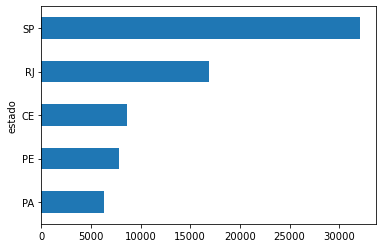

In [7]:
df.groupby('estado')['obitosAcumulado'].max().sort_values().tail(5).plot(kind='barh')

In [8]:
df['data'] = df['data'].dt.strftime('%d/%m')

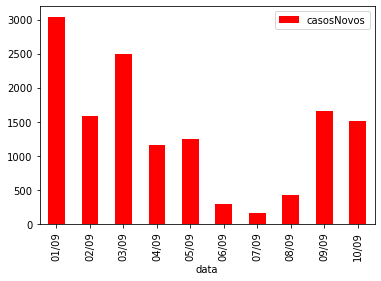

In [9]:
sp = df.query('municipio == "São Paulo"')
sp.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

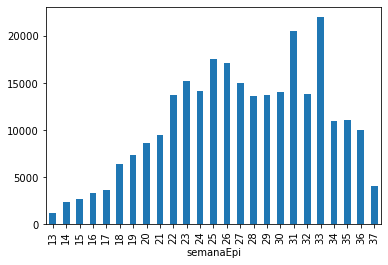

In [10]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')

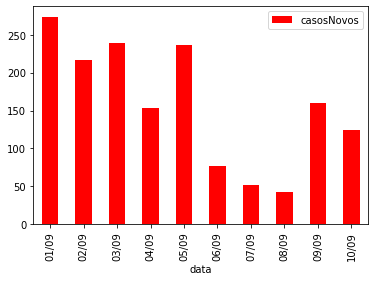

In [11]:
sjc = df.query('municipio == "São José dos Campos"')
sjc.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

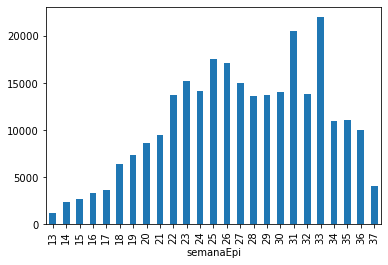

In [12]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')